In [33]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stocks = ['HUM', 'ROIV', 'HRMY', 'INMD','CVS','PDCO','MOH','AMN','ALKS','AMGN']
start_date = '2022-12-30'
end_date = '2023-12-31'
data = yf.download(stocks, start=start_date, end = end_date)['Adj Close']
daily_return = data.pct_change().loc['2023-01-01':'2023-12-31', :]
benchmark = yf.download('^GSPC', start=start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed


In [34]:
daily_return

Ticker,ALKS,AMGN,AMN,CVS,HRMY,HUM,INMD,MOH,PDCO,ROIV
Date,,,,,,,,,,
2023-01-03,-0.009950,-0.003769,0.030928,-0.003005,-0.038838,-0.022843,-0.012325,-0.034220,-0.005708,-0.105131
2023-01-04,-0.020874,0.010472,-0.019151,-0.010010,0.015483,-0.016724,0.028361,-0.016901,0.017223,0.057343
2023-01-05,-0.000790,0.009342,0.030682,-0.016634,0.002603,-0.008331,-0.014065,-0.047810,-0.019400,0.076720
2023-01-06,0.071118,0.031253,0.024356,0.012714,-0.004822,0.009262,0.069650,0.010585,0.018345,0.136364
2023-01-09,-0.035780,-0.018459,-0.004646,-0.001201,-0.161014,-0.021988,-0.066161,-0.017567,-0.001766,0.018378
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.013430,0.017291,0.022839,0.001781,-0.004645,-0.001630,-0.000880,0.000419,-0.004577,0.033207
2023-12-26,-0.001791,-0.000915,0.012301,0.003047,0.029247,-0.000816,0.012324,-0.001758,0.006013,0.053260
2023-12-27,0.006817,0.009264,-0.006736,-0.002279,-0.003325,-0.003114,-0.021739,-0.002572,0.003165,0.009590


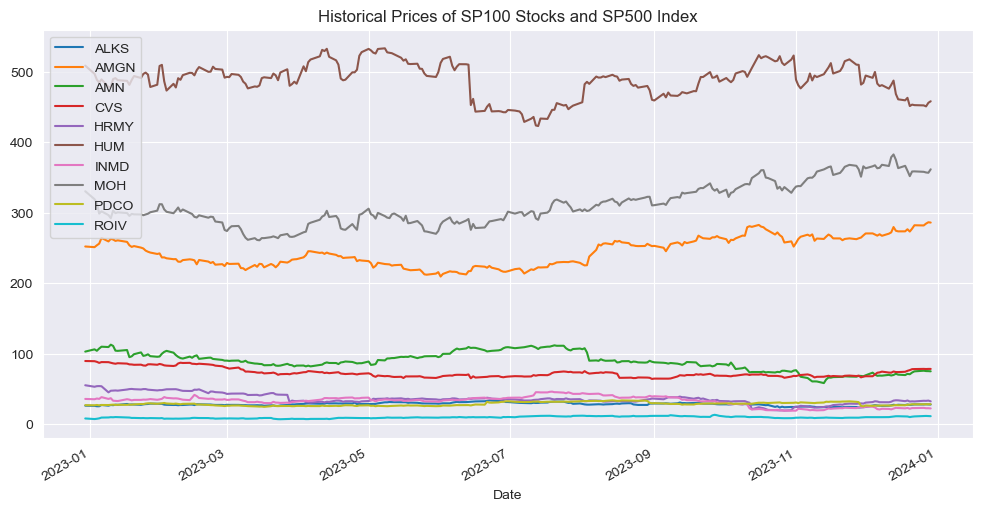

In [35]:
# Visualize the data
sns.set_style('darkgrid')
data.plot(figsize=(12, 6))
plt.title('Historical Prices of SP100 Stocks and SP500 Index')
plt.legend(loc='upper left')
plt.show()

In [36]:
data

Ticker,ALKS,AMGN,AMN,CVS,HRMY,HUM,INMD,MOH,PDCO,ROIV
Date,,,,,,,,,,
2022-12-30,26.129999,251.872894,102.820000,89.462158,55.099998,508.326263,35.700001,330.220001,26.821337,7.99
2023-01-03,25.870001,250.923492,106.000000,89.193352,52.959999,496.714508,35.259998,318.920013,26.668236,7.15
2023-01-04,25.330000,253.551178,103.970001,88.300560,53.779999,488.407654,36.259998,313.529999,27.127537,7.56
2023-01-05,25.309999,255.919876,107.160004,86.831749,53.919998,484.338562,35.750000,298.540009,26.601254,8.14
2023-01-06,27.110001,263.918030,109.769997,87.935753,53.660000,488.824463,38.240002,301.700012,27.089262,9.25
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,27.920000,281.955841,74.790001,78.051079,32.139999,452.311523,22.719999,358.380005,28.022686,10.89
2023-12-26,27.870001,281.697845,75.709999,78.288918,33.080002,451.942230,23.000000,357.750000,28.191198,11.47
2023-12-27,28.059999,284.307465,75.199997,78.110535,32.970001,450.535034,22.500000,356.829987,28.280413,11.58


In [37]:
import numpy as np

# Define the fitness function to maximize the Sharpe Ratio
def fitness_function(weights, data):
    data_returns = np.log(data) - np.log(data.shift(1))
    data_returns = data_returns.dropna()
    
    portfolio_returns = np.dot(data_returns, weights)
    portfolio_mean = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    sharpe_ratio = (portfolio_mean / portfolio_std) * np.sqrt(252)
    return sharpe_ratio

In [38]:
# Define the genetic algorithm
def genetic_algorithm(data, population_size=200, num_generations=50, mutation_rate=0.05, elitism=0.1):
    # Initialize the population
    population = np.random.rand(population_size, len(data.columns))
    population = population / np.sum(population, axis=1)[:, np.newaxis]

    # Calculate fitness of initial population
    fitness = np.array([fitness_function(individual, data) for individual in population])
    
    for generation in range(num_generations):
        # Sort the population by fitness
        sorted_idx = np.argsort(fitness)[::-1]
        population = population[sorted_idx]
        fitness = fitness[sorted_idx]
        
        # Determine number of individuals to carry over via elitism
        num_elites = int(elitism * population_size)
        
        # Create the next generation, starting with the elites
        offspring = population[:num_elites]
        
        # Select parents for reproduction using tournament selection
        parent1_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent2_idx = np.random.randint(num_elites, population_size, size=population_size-num_elites)
        parent1 = population[parent1_idx]
        parent2 = population[parent2_idx]

        # Perform crossover and mutation to create the next generation
        crossover_prob = np.random.rand(population_size-num_elites, len(data.columns))
        crossover_mask = crossover_prob <= 0.5
        offspring_crossover = np.where(crossover_mask, parent1, parent2)

        mutation_prob = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_mask = mutation_prob <= mutation_rate
        mutation_values = np.random.rand(population_size-num_elites, len(data.columns))
        mutation_direction = np.random.choice([-1, 1], size=(population_size-num_elites, len(data.columns)))
        offspring_mutation = np.where(mutation_mask, offspring_crossover + mutation_direction * mutation_values, offspring_crossover)

        # Ensure the offspring population has valid weights
        offspring_mutation = offspring_mutation / np.sum(offspring_mutation, axis=1)[:, np.newaxis]

        # Combine elites and offspring to create the next generation
        population = np.vstack((population[:num_elites], offspring_mutation))
        
        # Calculate fitness of new population
        fitness = np.array([fitness_function(individual, data) for individual in population])
        
    # Return the best individual from the final population
    best_idx = np.argmax(fitness)
    best_individual = population[best_idx]
    print('Best Sharpe Ratio: ', np.max(fitness)) 

    return best_individual

Best Sharpe Ratio:  nan


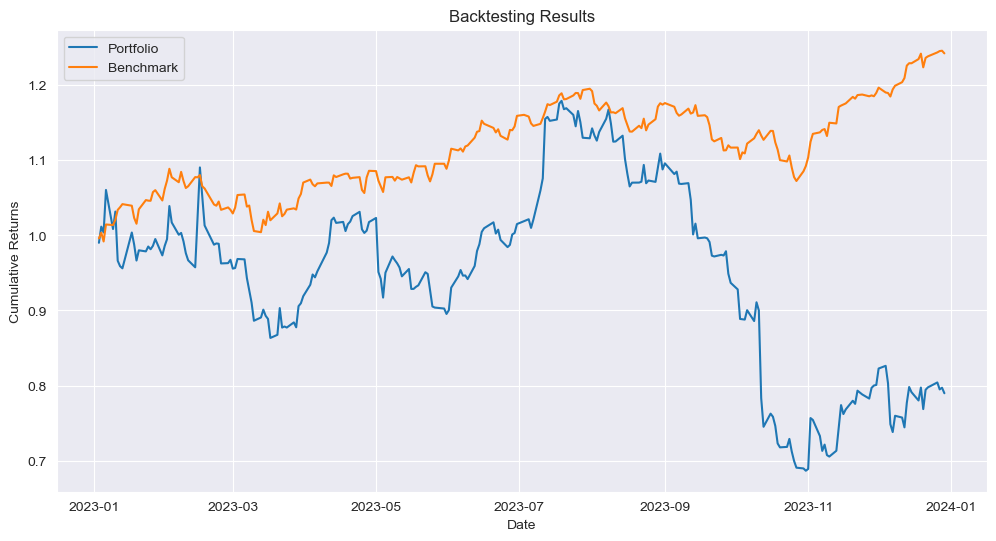

Portfolio Statistics:
---------------------
Mean Daily Return: -0.0007
Standard Deviation: 0.0228
Sharpe Ratio: -0.4739
Final Value: 789.76

Benchmark Statistics:
---------------------
Mean Daily Return: 0.0009
Standard Deviation: 0.0082
Sharpe Ratio: 1.7398
Final Value: 1242.31


In [40]:
# Implement the genetic algorithm in backtesting
from datetime import datetime, timedelta

# Seed for reproducibility
np.random.seed(42)

def backtest(genetic_algorithm, data, benchmark, initial_capital):
    # Split the data into training and testing sets
    train_data = data.iloc[:-252]
    test_data = data.iloc[-252:]

    # Run the genetic algorithm on the training set to find the optimal portfolio weights
    weights = genetic_algorithm(data=train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)
    # print(weights)

    # Set any negative weights to 0
    weights[weights < 0] = 0

    # Normalize remaining positive weights to sum to 1
    weights /= weights.sum()

    # Calculate the returns of the portfolio and the benchmark on the test set
    portfolio_returns = np.dot(test_data.pct_change().dropna(), weights)
    portfolio_cum_returns = np.cumprod(1 + portfolio_returns)
    portfolio_value = initial_capital * portfolio_cum_returns[-1]
    benchmark_returns = benchmark.iloc[-252:].pct_change().dropna()
    benchmark_cum_returns = np.cumprod(1 + benchmark_returns)
    benchmark_value = initial_capital * benchmark_cum_returns[-1]

    # Calculate performance metrics
    portfolio_mean_return = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)
    portfolio_sharpe_ratio = (portfolio_mean_return / portfolio_std) * np.sqrt(252)
    benchmark_mean_return = np.mean(benchmark_returns)
    benchmark_std = np.std(benchmark_returns)
    benchmark_sharpe_ratio = (benchmark_mean_return / benchmark_std) * np.sqrt(252)

    # print(portfolio_cum_returns)

    # Visualize the performance of the portfolio and the benchmark
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(benchmark_cum_returns.index, portfolio_cum_returns, label='Portfolio')
    ax.plot(benchmark_cum_returns, label='Benchmark')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Returns')
    ax.set_title('Backtesting Results')
    ax.legend()
    plt.show()

    # Print performance metrics
    print('Portfolio Statistics:')
    print('---------------------')
    print('Mean Daily Return: {:.4f}'.format(portfolio_mean_return))
    print('Standard Deviation: {:.4f}'.format(portfolio_std))
    print('Sharpe Ratio: {:.4f}'.format(portfolio_sharpe_ratio))
    print('Final Value: {:.2f}'.format(portfolio_value))
    print('')
    print('Benchmark Statistics:')
    print('---------------------')
    print('Mean Daily Return: {:.4f}'.format(benchmark_mean_return))
    print('Standard Deviation: {:.4f}'.format(benchmark_std))
    print('Sharpe Ratio: {:.4f}'.format(benchmark_sharpe_ratio))
    print('Final Value: {:.2f}'.format(benchmark_value))
    
    return portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns
    
portfolio_returns, benchmark_returns, portfolio_cum_returns, benchmark_cum_returns = backtest(genetic_algorithm, data, benchmark, initial_capital=1000)

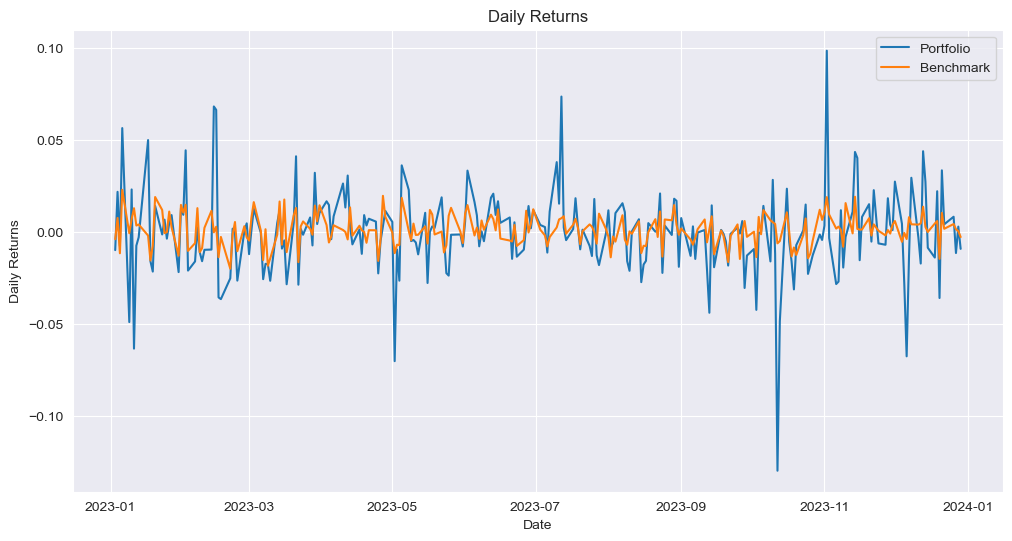

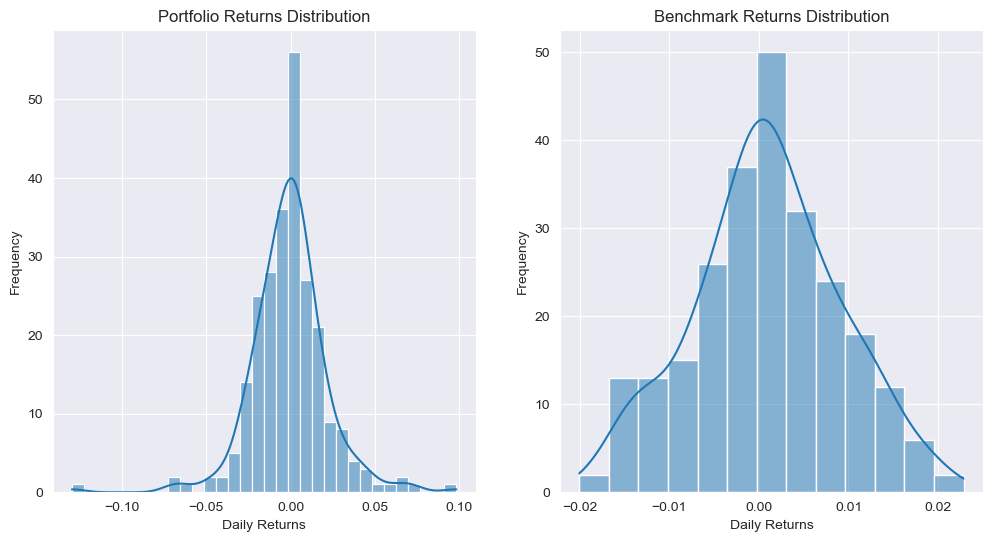

In [41]:
# Returns comparison
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(benchmark_returns.index, portfolio_returns, label='Portfolio')
ax.plot(benchmark_returns, label='Benchmark')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Returns')
ax.set_title('Daily Returns')
ax.legend()
plt.show()

# Returns distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(portfolio_returns, ax=axes[0], kde=True)
sns.histplot(benchmark_returns, ax=axes[1], kde=True)
axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Portfolio Returns Distribution')
axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Benchmark Returns Distribution')
plt.show()

C:\Users\xusen\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\xusen\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\xusen\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\xusen\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\xusen\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best Sharpe Ratio:  nan
Best Sharpe Ratio:  9.286186151241985
Best Sharpe Ratio:  3.6602488739215158
Best Sharpe Ratio:  4.8327650108837386
Best Sharpe Ratio:  3.193393918343566
Best Sharpe Ratio:  2.6646624038717786
Best Sharpe Ratio:  2.812487507124967
Best Sharpe Ratio:  3.019906984821233
Best Sharpe Ratio:  2.2495666563830103
Best Sharpe Ratio:  1.7762922557288576
Best Sharpe Ratio:  1.7862144986065411


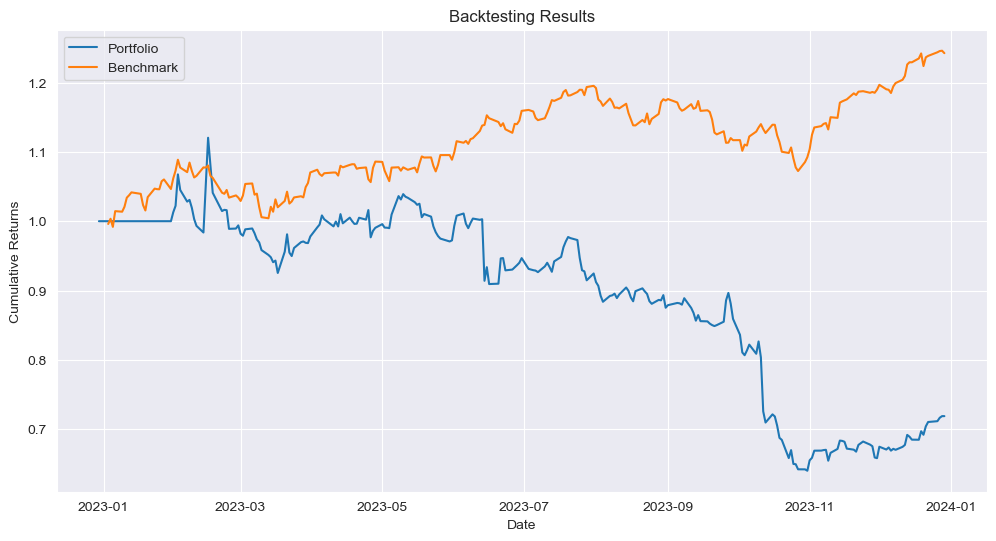

Portfolio Statistics:
---------------------
Mean Daily Return: -0.12%
Standard Deviation: 5.70%
Sharpe Ratio: -0.28
Final Value: 718.90

Benchmark Statistics:
---------------------
Mean Daily Return: 0.09%
Standard Deviation: 2.86%
Sharpe Ratio: -0.49
Final Value: 1242.31



In [42]:
# Seed for reproducibility
np.random.seed(42)

def backtest_monthly(optimization_function, data, benchmark, initial_capital):

    # Initialize the portfolio value and the portfolio weights
    # initial_capital = 1000
    portfolio_value = initial_capital
    test_data = data.iloc[-252:]

    # Initialize history of weights and portfolio values
    weights_history = pd.DataFrame(index=test_data.index, columns=data.columns)
    portfolio_value_history = pd.Series(index=test_data.index, name='Portfolio Value', dtype='float')
    portfolio_value_history.iloc[0] = portfolio_value

    # Loop through the data one month at a time
    for i in range(21, len(test_data), 21):
        # Get the data for the current month
        month_data = test_data.iloc[i-21:i]

        # Call the optimization function to get the portfolio weights for the current month
        train_data = data.loc[:month_data.index[0]]
        weights = optimization_function(train_data, population_size=100, num_generations=50, mutation_rate=0.01, elitism=0.01)

        # Set any negative weights to 0
        weights[weights < 0] = 0

        # Normalize remaining positive weights to sum to 1
        weights /= weights.sum()

        # Save the weights for the current month
        weights_history.loc[month_data.index[-1]] = weights
        month_returns = month_data.pct_change() * weights

        # Loop through the data one day at a time
        for j in range(1, len(month_returns)):
            # Calculate the portfolio value for the current day
            day_returns = month_returns.iloc[j]
            portfolio_value = (1 + day_returns.sum()) * portfolio_value

            # Update the portfolio value and save it to the history
            portfolio_value_history.loc[month_returns.index[j]] = portfolio_value

    # Calculate the portfolio returns and the benchmark returns
    weights_history = weights_history.fillna(method='ffill')
    portfolio_returns = (weights_history[:-1] * test_data.pct_change()[1:]).sum(axis=1)
    benchmark_returns = benchmark.iloc[-252:].pct_change()[1:]


    # Calculate the statistics
    portfolio_cumulative_returns = (1 + portfolio_returns).cumprod()
    benchmark_cumulative_returns = (1 + benchmark_returns).cumprod()
    portfolio_mean_return = portfolio_returns.mean()
    benchmark_mean_return = benchmark_returns.mean()
    portfolio_volatility = portfolio_returns.std() * np.sqrt(12)
    benchmark_volatility = benchmark_returns.std() * np.sqrt(12)
    sharpe_ratio = (portfolio_mean_return - 0.015) / portfolio_volatility
    benchmark_sharpe_ratio = (benchmark_mean_return - 0.015) / benchmark_volatility

    # Portfolio & Benchmark value
    benchmark_value = initial_capital * benchmark_cumulative_returns[-1]
    portfolio_value = initial_capital * portfolio_cumulative_returns[-1]


    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_cumulative_returns, label='Portfolio')
    plt.plot(benchmark_cumulative_returns, label='Benchmark')
    plt.legend(loc='upper left')
    plt.title('Backtesting Results')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.show()

    # Print the portfolio statistics
    print('Portfolio Statistics:')
    print('---------------------')
    print(f'Mean Daily Return: {portfolio_mean_return:.2%}')
    print(f'Standard Deviation: {portfolio_volatility:.2%}')
    print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
    print('Final Value: {:.2f}'.format(portfolio_value))
    print()

    # Print the benchmark statistics
    print('Benchmark Statistics:')
    print('---------------------')
    print(f'Mean Daily Return: {benchmark_mean_return:.2%}')
    print(f'Standard Deviation: {benchmark_volatility:.2%}')
    print(f'Sharpe Ratio: {benchmark_sharpe_ratio:.2f}')
    print('Final Value: {:.2f}'.format(benchmark_value))
    print()


    return weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns
  
# Run backtesting
weights_history, portfolio_value_history, portfolio_cumulative_returns, benchmark_cumulative_returns = backtest_monthly(genetic_algorithm, data, benchmark, initial_capital=1000)